# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## importaciones


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

In [147]:
df=pd.read_csv("datasets_calificaciones.csv", index_col=False)


### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

# Punto 1
#### Visualizamos la estructura del dataFrame

In [148]:
print("primeros 5 datos ")
print(df.head())

print("<------------------------------------------------------------------------------>")

print("Ultimos 5 datos ")
print(df.tail())

primeros 5 datos 
        estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
0        ana pérez  matematicas         8       7.5     9        95%
1     carlos lópez       fisica       6.2         7   NaN        88%
2      maría gómez      quimica         9       8.8   9.5       100%
3  pedro rodríguez     historia       7.5         6     7         75
4     laura vargas  matematicas                 9.2   8.5        92%
<------------------------------------------------------------------------------>
Ultimos 5 datos 
         estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
95  josefina torres     historia       7.4       6.8   7.2        81%
96  bautista vargas  matematicas       8.7       NaN   8.5        92%
97        emma soto       fisica       6.6       7.0   6.4        83%
98       mateo díaz      quimica       9.5       9.7              98%
99  sofía fernández     historia       7.1       7.6   7.5        87%


## Visualizamos los datos (columnas)

In [149]:
print("Tipo de datos en las columnas:")
df.info()


Tipo de datos en las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


## Vemos la cantidad de datos nulos (si es que los hay)

In [150]:
print("Valores nulos: ")
df.isnull().sum()

Valores nulos: 


estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64

# Punto 3


### Conversacion de datos, pasaremos los datos de las columnas Parcial 1 y 2, tambien la de final a numericos. Cualquier datos que no es numero pasara a ser NaN y facilitara realizar actividades estadísticas.

In [151]:
df["Parcial 1"]=pd.to_numeric(df["Parcial 1"], errors='coerce')
df["Parcial 2"]=pd.to_numeric(df["Parcial 2"], errors='coerce')
df["Final"]=pd.to_numeric(df["Final"], errors='coerce')
df

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.0,7.5,9.0,95%
1,carlos lópez,fisica,6.2,7.0,NaN,88%
2,maría gómez,quimica,9.0,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6.0,7.0,75
4,laura vargas,matematicas,NaN,9.2,8.5,92%
...,...,...,...,...,...,...
95,josefina torres,historia,7.4,6.8,7.2,81%
96,bautista vargas,matematicas,8.7,NaN,8.5,92%
97,emma soto,fisica,6.6,7.0,6.4,83%
98,mateo díaz,quimica,9.5,9.7,NaN,98%


# Ahora convertiremos los valores nulos con la media de cada una de ellas
### Tambien redondearemos a un solo decimas


In [ ]:
df["Parcial 1"]=df["Parcial 1"].fillna(df["Parcial 1"].mean()).round()
df["Parcial 2"]=df["Parcial 2"].fillna(df["Parcial 2"].mean()).round()
df["Final"]=df["Final"].fillna(df["Final"].mean()).round()
df

,Estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,matematicas,8.0,8.0,9.0,95%
1,Carlos López,fisica,6.0,7.0,7.9,88%
2,María Gómez,quimica,9.0,9.0,9.5,100%
3,Pedro Rodríguez,historia,8.0,6.0,7.0,75%
4,Laura Vargas,matematicas,8.0,9.0,8.5,92%
...,...,...,...,...,...,...
95,Josefina Torres,historia,7.0,7.0,7.2,81%
96,Bautista Vargas,matematicas,9.0,8.0,8.5,92%
97,Emma Soto,fisica,7.0,7.0,6.4,83%
98,Mateo Díaz,quimica,10.0,10.0,7.9,98%


### Verificamos los valores nulos


In [ ]:
df.isnull().sum()

estudiante    0
Materia       0
Parcial 1     0
Parcial 2     0
Final         0
Asistencia    0
dtype: int64

### Ahora convertiremos los valores de la columna asistencia a enteros y eliminaremos el "%". Para luego agregarlos a todos los numeros nuevamente
### Tambien limitaremos los valores a 100 porque hay algunos que lo superan y es ilogico

In [154]:
df["Asistencia"]=df["Asistencia"].str.replace("%", "").astype(int)
# df["Asistencia"] = df["Asistencia"].str.replace("%", "").astype(int)
df["Asistencia"]=df["Asistencia"].clip(100, upper=True).astype(str) + "%"
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.0,7.5,9.0,95%
1,carlos lópez,fisica,6.2,7.0,7.9,88%
2,maría gómez,quimica,9.0,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6.0,7.0,75%
4,laura vargas,matematicas,7.8,9.2,8.5,92%


### Ahora haremos que todos los nombres y apellidos empiecen con mayusculas como se debe, tambien eliminaremos los espacios en blancos (si es que los hay)

In [155]:
df["estudiante"]=df["estudiante"].str.title().str.strip()
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,matematicas,8.0,7.5,9.0,95%
1,Carlos López,fisica,6.2,7.0,7.9,88%
2,María Gómez,quimica,9.0,8.8,9.5,100%
3,Pedro Rodríguez,historia,7.5,6.0,7.0,75%
4,Laura Vargas,matematicas,7.8,9.2,8.5,92%


### Renombramos la columna "estudiante" a "Estudiante"

In [156]:
df=df.rename(columns={"estudiante":"Estudiante"})
df.head()

,Estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,matematicas,8.0,7.5,9.0,95%
1,Carlos López,fisica,6.2,7.0,7.9,88%
2,María Gómez,quimica,9.0,8.8,9.5,100%
3,Pedro Rodríguez,historia,7.5,6.0,7.0,75%
4,Laura Vargas,matematicas,7.8,9.2,8.5,92%


# Punto 4
## Ahora vamos a obtener estadisticas descriptivas en base a este dataFrame

In [180]:
print("Las estidiantes son:")

print(df.describe().round(2))
df
print("<------------------------------------------------------------------------------>")

print("Promedio de notas por materias:")
print(df.groupby("Materia")["Final"].mean().round(2))


Las estidiantes son:
       Parcial 1  Parcial 2   Final
count     100.00     100.00  100.00
mean        7.87       7.87    7.90
std         1.17       1.17    1.11
min         6.00       6.00    5.70
25%         7.00       7.00    7.10
50%         8.00       8.00    7.90
75%         9.00       9.00    8.83
max        10.00      10.00    9.90
<------------------------------------------------------------------------------>
Promedio de notas por materias:
Materia
ciencias sociales       7.90
fisica                  6.62
historia                7.48
literatura universal    8.20
matematicas             8.47
programacion basica     6.30
quimica                 9.03
Name: Final, dtype: float64


### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.


## Histograma de asistencia promedio por materia

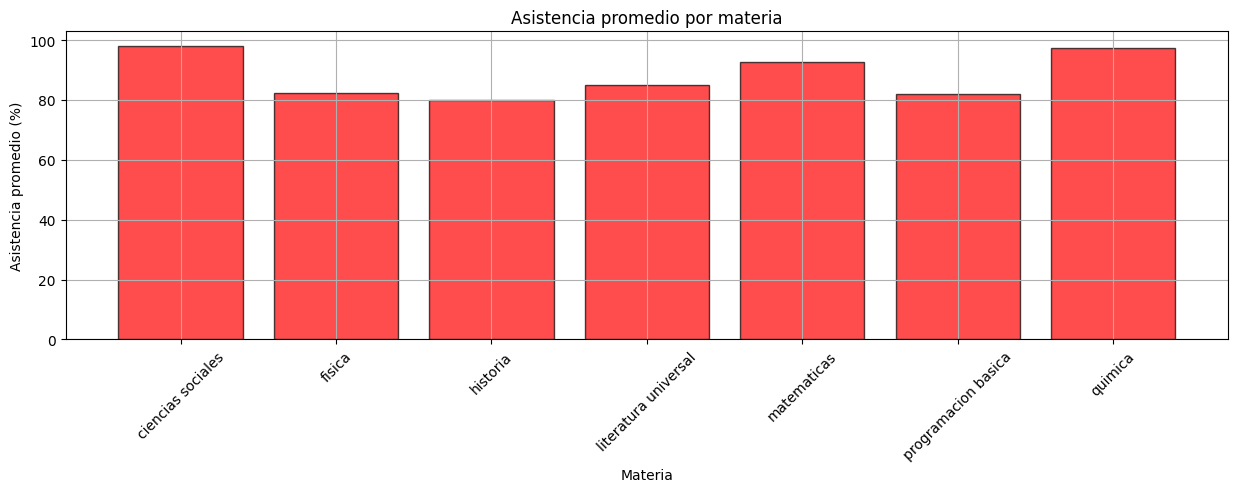

In [158]:
asistencia_por_materia=df[["Materia", "Asistencia"]].copy()

asistencia_por_materia["Asistencia"]=asistencia_por_materia["Asistencia"].str.replace("%", "").astype(int)

rejunte=asistencia_por_materia.groupby("Materia")["Asistencia"].mean()

plt.figure(figsize=(15, 4))
plt.title("Asistencia promedio por materia")
plt.bar(rejunte.index, rejunte.values, color="red", alpha=0.7, edgecolor="black")
plt.xlabel("Materia")
plt.ylabel("Asistencia promedio (%)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Grafico de notas por materia
Guardamos los datos de las materias en una variable para luego mostrarlas

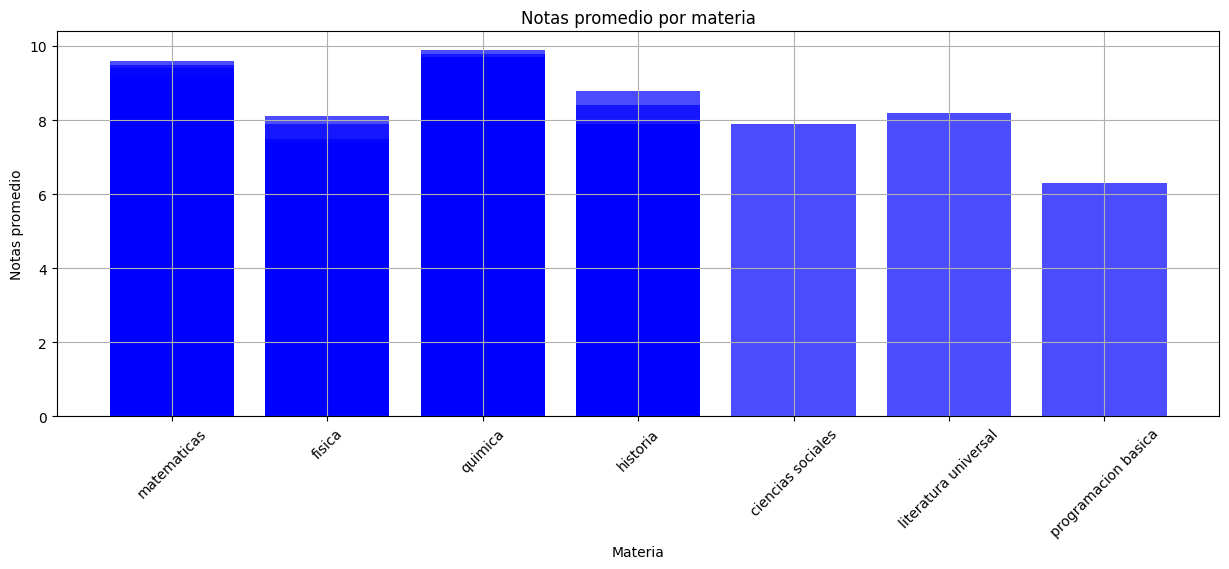

In [159]:
notas_por_materia=df[["Materia", "Final"]].copy()
notas_por_materia["Final"]=notas_por_materia["Final"]
notas_por_materia.groupby("Materia")["Final"].mean()


plt.figure(figsize=(15, 5))
plt.title("Notas promedio por materia")
plt.bar(notas_por_materia["Materia"], notas_por_materia["Final"], color="blue", alpha=0.7)
plt.xlabel("Materia")
plt.ylabel("Notas promedio")
plt.xticks(rotation=45)
plt.grid()
plt.show()

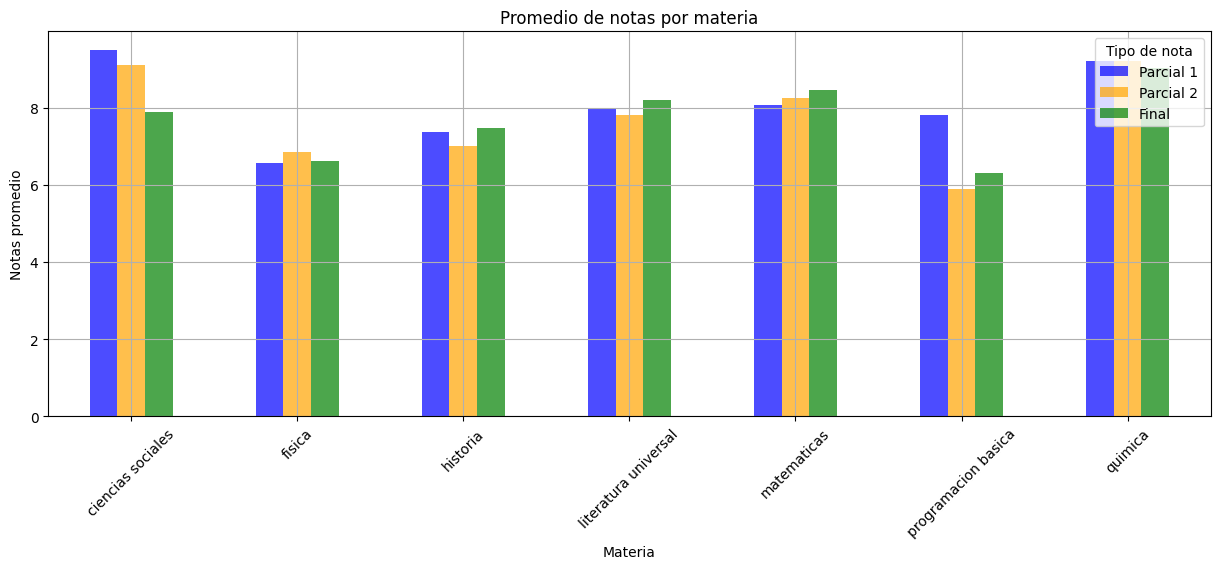

In [160]:

# promedio_por_materia=df.groupby("Materia")["Final"].mean().round(2)
promedio_por_materia=df.groupby("Materia")[["Parcial 1", "Parcial 2", "Final"]].mean().round(2)
promedio_por_materia

promedio_por_materia.plot(kind="bar", color=["blue", "orange", "green"], alpha=0.7 ,figsize=(15, 5))
plt.title("Promedio de notas por materia")
plt.xlabel("Materia")
plt.ylabel("Notas promedio")
plt.xticks(rotation=45)
plt.legend(title="Tipo de nota")
plt.grid()
plt.show()

### PUNTO 6
### Guardar un DataFrame en una Base de Datos SQLite

Ahora importaremos nuestro DataFrame en una base de datos SQLite de la siguiente manera

In [161]:

import sqlite3
conn = sqlite3.connect("calificaciones.sqlite3")
df.to_sql("calificaciones", conn, if_exists="replace", index=False)
conn.close()
